# `20180310` Testing the dynamic DAC

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve

import re
import glob, os

## Creating the set of acquisitions

One-5-VGA@0x22-spimode1-64msps.csv
first


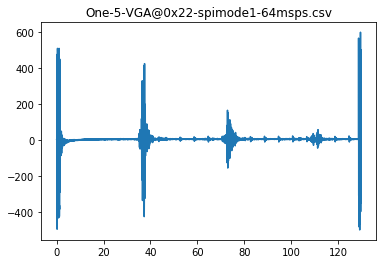

One-0-VGA@0x22-spimode1-32msps.csv
second


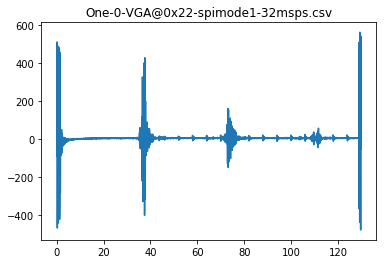

In [54]:
AA = []
lbl = []
IDLine = []

for CSVFile in glob.glob("*.csv"):
    print CSVFile
    A = np.genfromtxt(CSVFile, delimiter=';').astype(int)[1:]
    tmp = [] 
    N = len(A)
    FF = CSVFile.split(".")[0].split("-")[-1]
    lbl.append(  CSVFile.split("-")[2] )
    f = int(re.sub('[^0-9]','', FF))
    #F = int(CSVFile.split(".")[0])

    if (A[4]) > 0b111:
        print "first"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+0]&0b111) + A[2*i+1] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16) # Identify the # of the line
            tmp.append( value ) 
    else:
        print "second"
        for i in range(len(A)/2-1):
            value = 128*(A[2*i+1]&0b111) + A[2*i+2] - 512
            IDLine.append((A[2*i+1]&0b11110000)/16)
            #print A[2*i]&0b10000000,A[2*i+1]&0b10000000,
            tmp.append( value )
            #print A[2*i+1]
            #print A[i+1]-A[i] 
            
    #t = t*1.0/f
    t = [ 1.0*x/f for x in range(len(tmp))]
    plt.plot(t,tmp)
    plt.title(CSVFile)
    plt.savefig(CSVFile.split(".")[0].split("/")[-1]+".jpg")
    plt.show()
    
    AA.append(tmp)
    




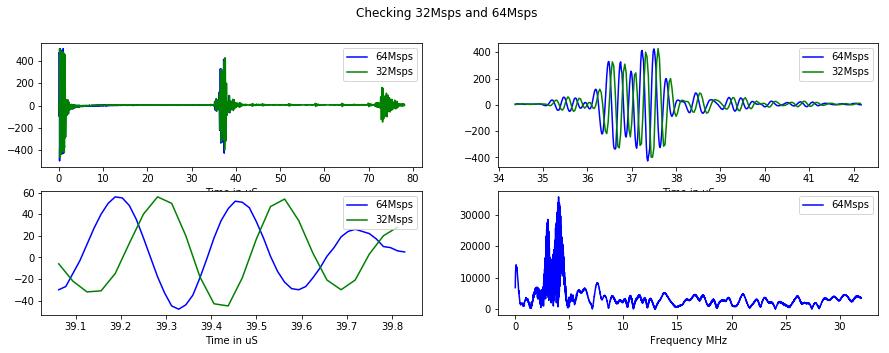

In [57]:
t1 = [ 1.0*x/32 for x in range(len(tmp))]
t2 = [ 1.0*x/64 for x in range(len(tmp))]

s1 = AA[-1] # 32
s2 = AA[0]  # 64

fLegend = [ 64.0*x/len(s2) for x in range(len(s2))]
fm = len(fLegend)/2

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,5))

ax1.plot(t2[0:2500],s2[0:2500],"b",label="64Msps")
ax1.plot(t1[0:2500],s1[0:2500],"g",label="32Msps")
ax1.set_xlabel("Time in uS")
ax2.plot(t2[2*1100:2*1350],s2[2*1100:2*1350],"b",label="64Msps")
ax2.plot(t1[1100:1350],s1[1100:1350],"g",label="32Msps")
ax2.legend()
ax2.set_xlabel("Time in uS")
ax1.set_xlabel("Time in uS")
ax1.legend()

ax3.plot(t2[2*1250:2*1275],s2[2*1250:2*1275],"b",label="64Msps")
ax3.plot(t1[1250:1275],s1[1250:1275],"g",label="32Msps")
ax3.legend()
ax3.set_xlabel("Time in uS")


ax4.plot(fLegend[1:fm], np.abs(np.fft.fft(s2))[1:fm] ,"b",label="64Msps") 
ax4.legend()
ax4.set_xlabel("Frequency MHz")



plt.suptitle('Checking 32Msps and 64Msps')
plt.savefig("32_64.jpg", bbox_inches='tight')

plt.show()